# Delivery_time -> Predict delivery time using sorting time


In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as smf
import warnings
import statsmodels.formula.api as sm
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [159]:
dataset = pd.read_csv('delivery_time.csv')

In [160]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [161]:
dataset_1 = dataset.rename({'Delivery Time': 'Delivery_time','Sorting Time':'Sorting_time'},axis=1)

In [162]:
dataset_1

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [163]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_time  21 non-null     float64
 1   Sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Delivery_time', ylabel='Density'>

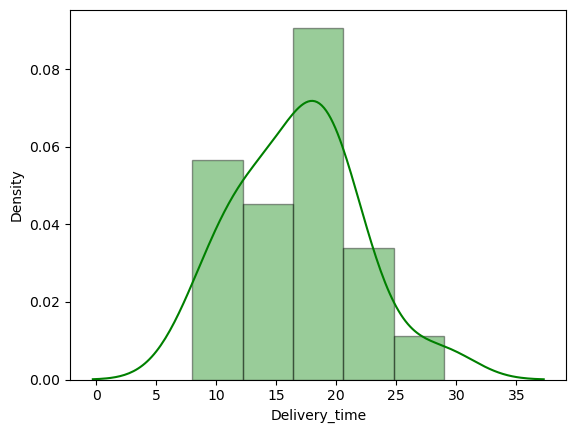

In [164]:
import seaborn as sns 
sns.distplot(dataset_1['Delivery_time'],color='green',hist_kws=dict(edgecolor = 'black'))

<AxesSubplot:xlabel='Sorting_time', ylabel='Density'>

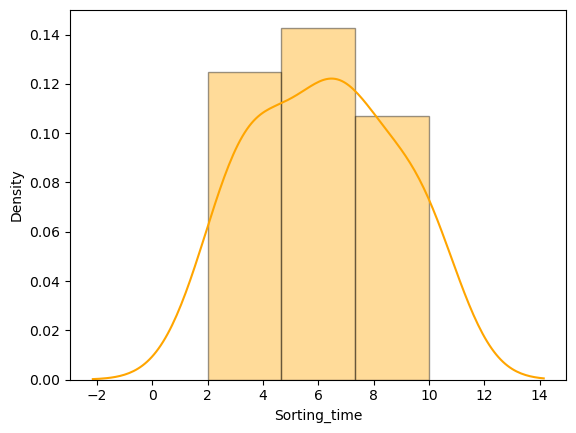

In [165]:
import seaborn as sns
sns.distplot(dataset_1['Sorting_time'],color='orange',hist_kws=dict(edgecolor = 'black'))

In [166]:
dataset_1['Delivery_time'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery_time, dtype: float64

<AxesSubplot:>

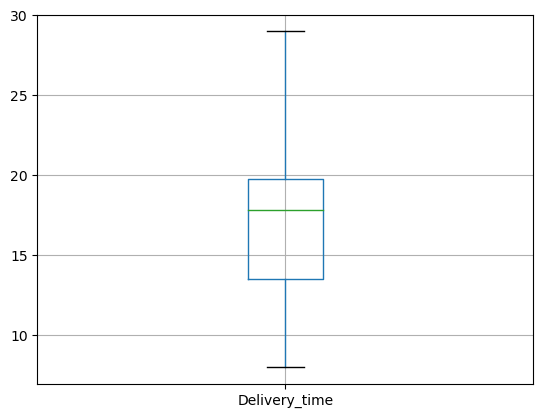

In [167]:
dataset_1.boxplot(column= ['Delivery_time'])

<AxesSubplot:>

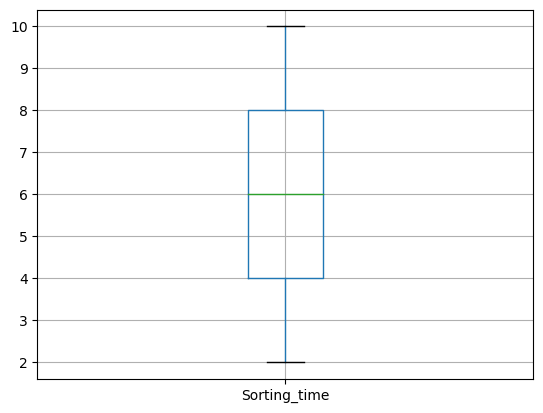

In [168]:
dataset_1.boxplot(column = ['Sorting_time'])

In [169]:
dataset_1.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


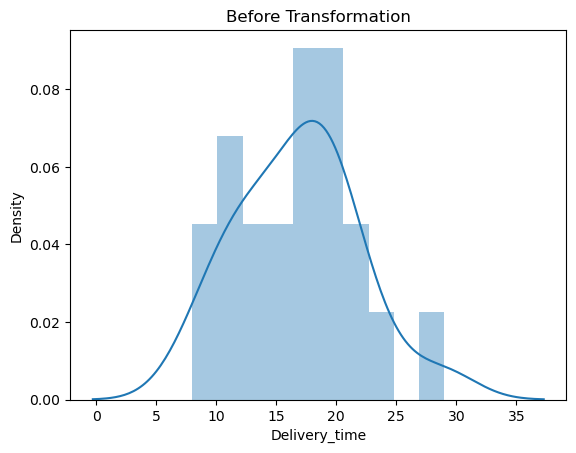

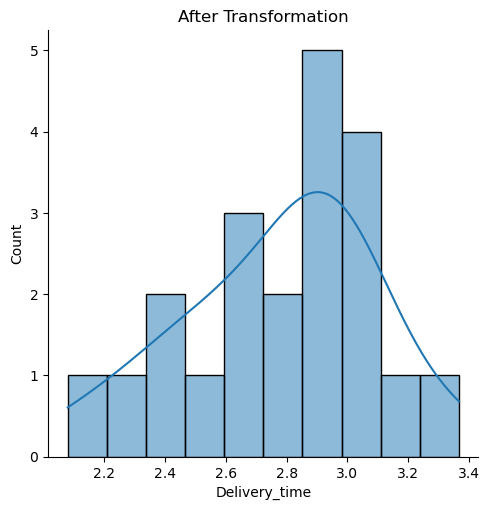

In [170]:
sns.distplot(dataset_1['Delivery_time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(dataset_1['Delivery_time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

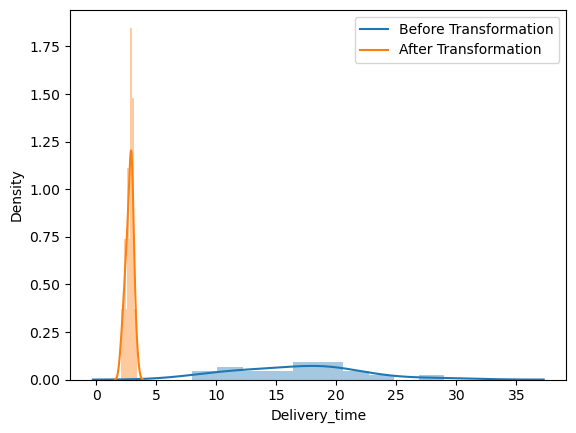

In [171]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dataset_1['Delivery_time'], bins = 10, kde = True)
sns.distplot(np.log(dataset_1['Delivery_time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

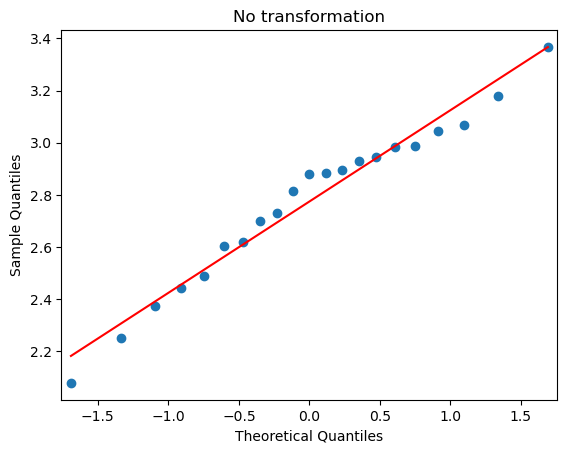

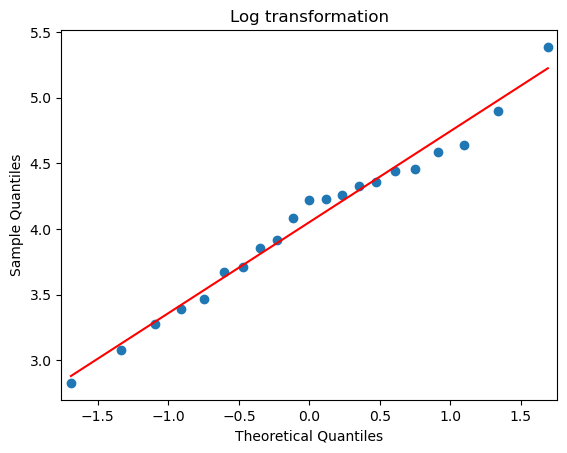

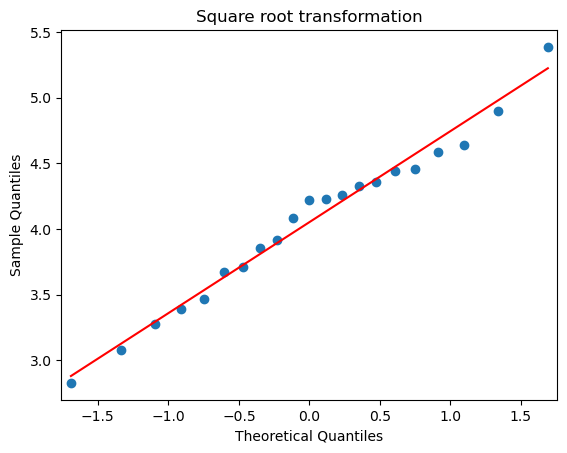

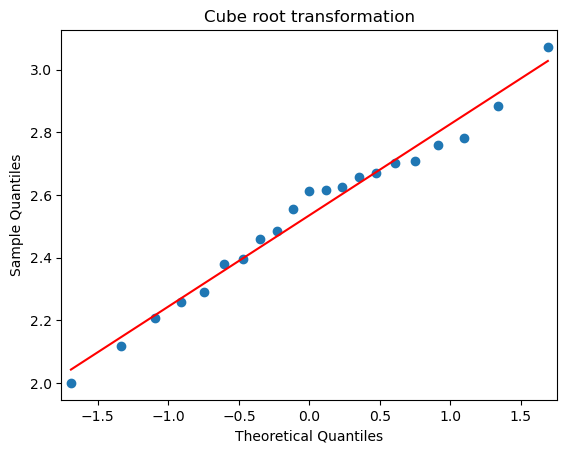

In [172]:
smf.qqplot(np.log(dataset_1['Delivery_time']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(dataset_1['Delivery_time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dataset_1['Delivery_time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(dataset_1['Delivery_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

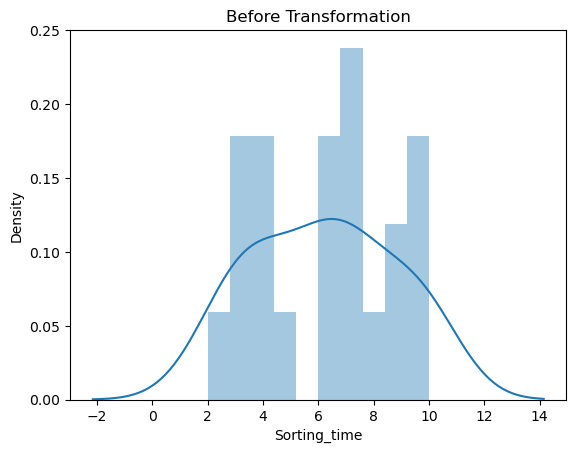

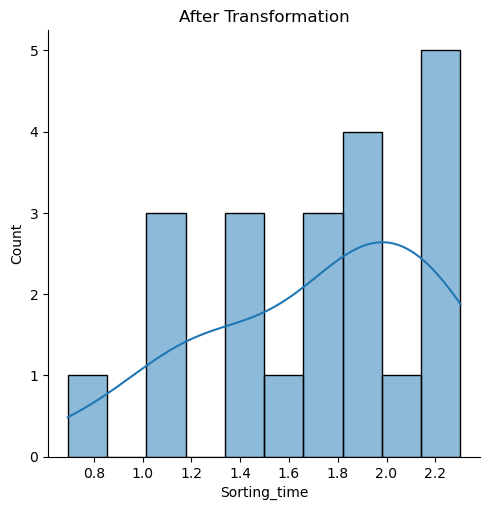

In [173]:
sns.distplot(dataset_1['Sorting_time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(dataset_1['Sorting_time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

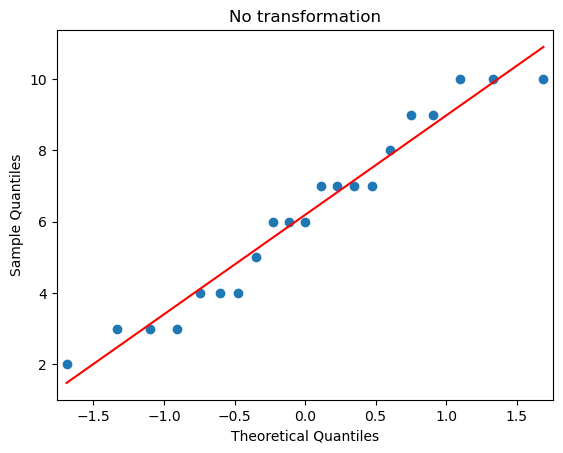

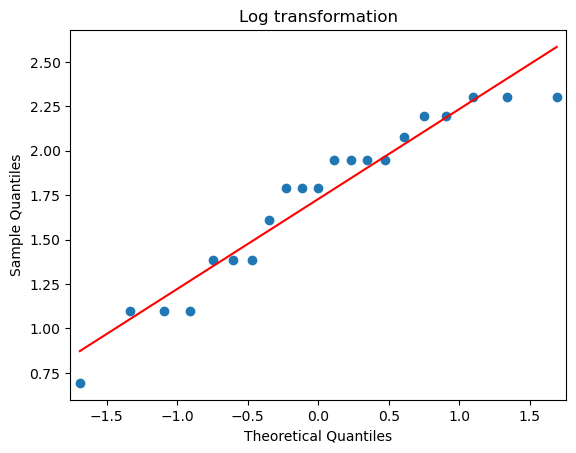

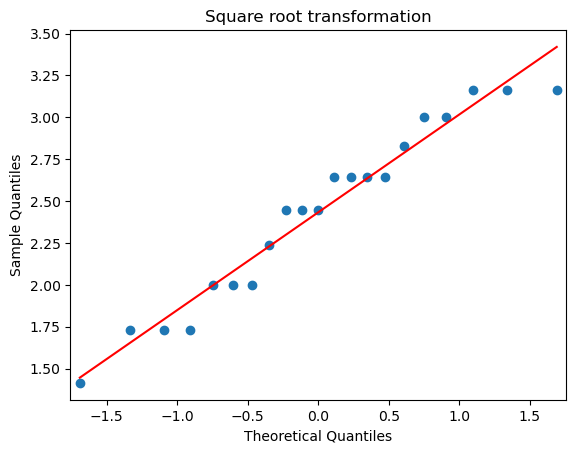

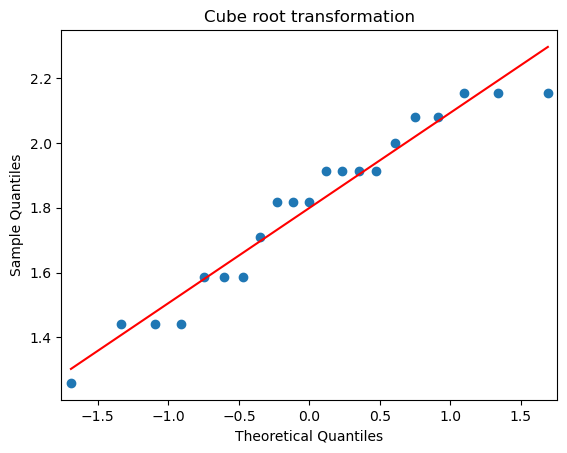

In [174]:
smf.qqplot(dataset_1['Sorting_time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(dataset_1['Sorting_time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dataset_1['Sorting_time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(dataset_1['Sorting_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [175]:
import statsmodels.formula.api as smf
model = smf.ols("Sorting_time~Delivery_time",data=dataset_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        11:10:05   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
Delivery_time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
model1=smf.ols('np.sqrt(Sorting_time)~np.sqrt(Delivery_time)',data=dataset_1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.sqrt(Sorting_time)   R-squared:                       0.729
Model:                               OLS   Adj. R-squared:                  0.715
Method:                    Least Squares   F-statistic:                     51.16
Date:                   Thu, 28 Sep 2023   Prob (F-statistic):           8.48e-07
Time:                           11:10:05   Log-Likelihood:                -2.3695
No. Observations:                     21   AIC:                             8.739
Df Residuals:                         19   BIC:                             10.83
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.5151      0.417     -1.236      0.232      -1.388       0.357
np.sqrt(Delivery_time)     0.7276      0.102      7.153      0.000       0.515       0.940
==============================================================================
Omnibus:                        0.396   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.001
Skew:                          -0.005   Prob(JB):                         1.00
Kurtosis:                       3.029   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
model2 = sm.ols('np.cbrt(Sorting_time)~np.cbrt(Delivery_time)',data=dataset_1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.cbrt(Sorting_time)   R-squared:                       0.744
Model:                               OLS   Adj. R-squared:                  0.731
Method:                    Least Squares   F-statistic:                     55.25
Date:                   Thu, 28 Sep 2023   Prob (F-statistic):           4.90e-07
Time:                           11:10:05   Log-Likelihood:                 12.617
No. Observations:                     21   AIC:                            -21.23
Df Residuals:                         19   BIC:                            -19.14
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.4315      0.302     -1.431      0.169      -1.063       0.200
np.cbrt(Delivery_time)     0.8800      0.118      7.433      0.000       0.632       1.128
==============================================================================
Omnibus:                        0.245   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.031
Skew:                          -0.078   Prob(JB):                        0.985
Kurtosis:                       2.894   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
model3 = sm.ols('np.log(Sorting_time)~np.log(Delivery_time)',data=dataset_1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_time)   R-squared:                       0.772
Model:                              OLS   Adj. R-squared:                  0.760
Method:                   Least Squares   F-statistic:                     64.39
Date:                  Thu, 28 Sep 2023   Prob (F-statistic):           1.60e-07
Time:                          11:10:05   Log-Likelihood:                 2.1913
No. Observations:                    21   AIC:                           -0.3826
Df Residuals:                        19   BIC:                             1.706
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.8573      0.450     -4.131      0.001      -2.798      -0.916
np.log(Delivery_time)     1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
model1_pred_y = np.square(model1.predict(dataset_1['Delivery_time']))
model2_pred_y = np.square(model2.predict(dataset_1['Delivery_time']))
model3_pred_y = np.square(model3.predict(dataset_1['Delivery_time']))

In [180]:
from sklearn.metrics import mean_squared_error
model1_rmse = np.sqrt(mean_squared_error(dataset_1['Sorting_time'],model1_pred_y))
model2_rmse = np.sqrt(mean_squared_error(dataset_1['Sorting_time'],model2_pred_y))
model3_rmse = np.sqrt(mean_squared_error(dataset_1['Sorting_time'],model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)


model= 1.4700989833173772 
model1= 1.419481082276218 
model2= 3.447558651245138 
model3= 3.414958350298363


<AxesSubplot:xlabel='Sorting_time', ylabel='Delivery_time'>

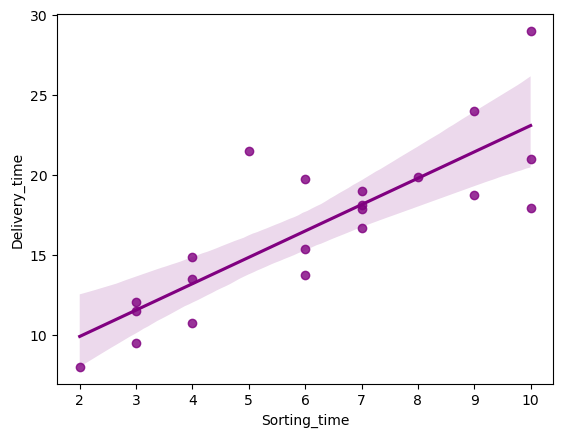

In [181]:
sns.regplot(x="Sorting_time",y="Delivery_time",data=dataset_1,color='purple')

In [182]:
model.params

Intercept       -0.756673
Delivery_time    0.413744
dtype: float64

In [183]:
model.tvalues , model.pvalues

(Intercept       -0.667290
 Delivery_time    6.387447
 dtype: float64,
 Intercept        0.512611
 Delivery_time    0.000004
 dtype: float64)

In [184]:
model.rsquared

0.682271474841723

In [185]:
model.rsquared_adj

0.6655489208860242

In [186]:
#assuming sorting time as 7
Delivery_time =  6.582734 + 1.649020*(7)

In [187]:
Delivery_time

18.125874

In [192]:
#predicting for 10,15,20,30 sorting_time
new_data=pd.Series([10,15,20,30])

In [199]:
data_pred = pd.DataFrame(new_data,columns=['Delivery_time'])

In [200]:
data_pred

,Delivery_time
0,10
1,15
2,20
3,30


In [201]:
model.predict(data_pred)

0     3.380763
1     5.449481
2     7.518199
3    11.655635
dtype: float64